# Reading DataSet

In [352]:
import pandas as pd 
import numpy as np

In [353]:
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [354]:
df.drop_duplicates()
df.dropna()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [355]:
df = df.drop(columns=["Id"])

In [356]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [357]:
# we can see that the data is perfectly balanced

In [358]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [359]:
species_type = df["Species"].unique().tolist()
species_type 

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [360]:
df["Species_cat"] = label_encoder.fit_transform(df["Species"])
df["Species_cat"].unique()

array([0, 1, 2])

# EDA

In [361]:
from matplotlib import pyplot as plt

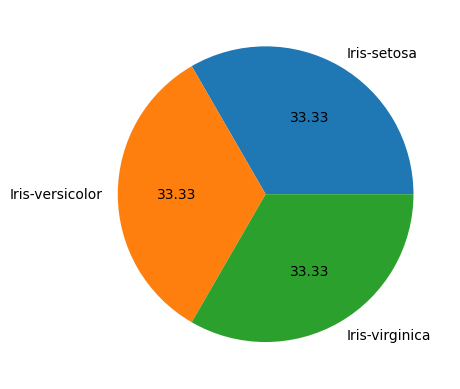

In [362]:
plt.pie(
    df["Species"].value_counts(),
    labels = df["Species"].unique(),
    autopct = "%0.2f"
    )
plt.show()

In [363]:
for species in df["Species"].unique() :
    print (species)
    avg_sepal_length = df[df["Species"]==species]["SepalLengthCm"].mean()
    avg_sepal_width = df[df["Species"]==species]["SepalWidthCm"].mean()
    avg_petal_length = df[df["Species"]==species]["PetalLengthCm"].mean()
    avg_petal_width = df[df["Species"]==species]["PetalWidthCm"].mean()
    
    print("avg sepal length : ",avg_sepal_length)
    print("avg sepal width : ",avg_sepal_width)
    print("avg petal length : ",avg_petal_length)
    print("avg petal width : ", avg_petal_width)
        

Iris-setosa
avg sepal length :  5.006
avg sepal width :  3.418
avg petal length :  1.464
avg petal width :  0.244
Iris-versicolor
avg sepal length :  5.936
avg sepal width :  2.7700000000000005
avg petal length :  4.26
avg petal width :  1.3259999999999998
Iris-virginica
avg sepal length :  6.587999999999998
avg sepal width :  2.974
avg petal length :  5.5520000000000005
avg petal width :  2.0260000000000002


##### Box Plot

In [364]:
import seaborn as sns

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

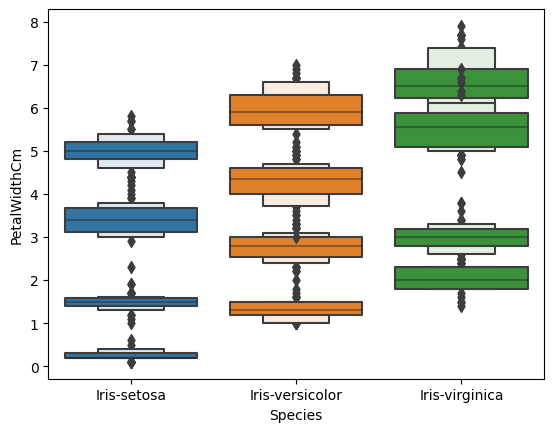

In [365]:
sns.boxenplot(
    x = df["Species"],
    y = df["SepalLengthCm"]
)
sns.boxenplot(
    x = df["Species"],
    y = df["SepalWidthCm"]
)
sns.boxenplot(
    x = df["Species"],
    y = df["PetalLengthCm"]
)
sns.boxenplot(
    x = df["Species"],
    y = df["PetalWidthCm"]
)

In [366]:
# we can clearly obverse the correlation between Petal Length, Petal Width, Sepal Length & Sepal Width with the species they belong to

# Model Building

In [367]:
from tensorflow.keras.utils import to_categorical

In [368]:
X = df.drop(columns="Species").to_numpy()
X.shape

(150, 5)

In [369]:
y = to_categorical(df["Species_cat"])
y.shape

(150, 3)

In [370]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

##### Neural Network

In [371]:
import tensorflow as tf
from tensorflow import convert_to_tensor
from tensorflow import keras
from keras.layers import Dense
from keras import Sequential

In [372]:
X_train = convert_to_tensor(X_train)
y_train = convert_to_tensor(y_train)
X_test = convert_to_tensor(X_test)
y_test = convert_to_tensor(y_test)

In [373]:
import keras_tuner as kt

In [382]:
def build_model (hp):
    unit_1 = hp.Int("unit_1",min_value = 15, max_value = 20 , step = 1)
    unit_2 = hp.Int("units_2",min_value = 5,max_value= 10, step = 1)
    
    model = Sequential()
    model.add(Dense(unit_1, activation ="relu", input_shape = X_train.shape[1:]))
    model.add(Dense(unit_2, activation ="relu"))
    model.add(Dense(3, activation = "softmax"))
    
    model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics =["accuracy"])
    
    return model

In [389]:
tuner = kt.RandomSearch(
    build_model,
    objective = "val_accuracy",
    max_trials = 27,
)

INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [390]:
tuner.search(X_train, y_train, epochs = 5, validation_data = (X_test,y_test) )

Trial 27 Complete [00h 00m 02s]
val_accuracy: 0.2888889014720917

Best val_accuracy So Far: 0.7111111283302307
Total elapsed time: 00h 00m 05s
INFO:tensorflow:Oracle triggered exit


In [391]:
model = tuner.get_best_models(num_models = 1)[0]
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                96        
                                                                 
 dense_1 (Dense)             (None, 9)                 153       
                                                                 
 dense_2 (Dense)             (None, 3)                 30        
                                                                 
Total params: 279 (1.09 KB)
Trainable params: 279 (1.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [392]:
scores = model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 9ms/step - loss: 1.1153 - accuracy: 0.7111


In [393]:
print (" Accuracy : ", scores[1])

 Accuracy :  0.7111111283302307


##### Decision Tree

In [405]:
X = df.drop(columns = ["Species","Species_cat"]).to_numpy()
X.shape

(150, 4)

In [406]:
y = df["Species"].to_numpy()
y.shape

(150,)

In [407]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [408]:
from sklearn import tree 
decision_tree = tree.DecisionTreeClassifier()

In [410]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [411]:
y_pred = decision_tree.predict(X_test)

In [417]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [416]:
print( accuracy_score(y_test,y_pred))

1.0


In [424]:
cm = confusion_matrix(y_test,y_pred)
print (cm)

[[14  0  0]
 [ 0 15  0]
 [ 0  0 16]]


In [425]:
import seaborn as sns

<Axes: >

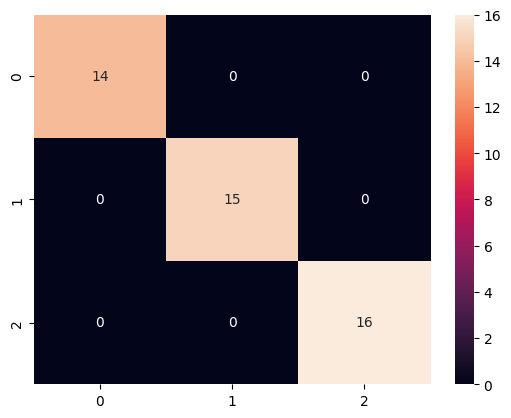

In [426]:
sns.heatmap(
    cm,
    annot = True,
)

In [422]:
cr = classification_report (y_test, y_pred, digits =3)
print (cr)

                 precision    recall  f1-score   support

    Iris-setosa      1.000     1.000     1.000        14
Iris-versicolor      1.000     1.000     1.000        15
 Iris-virginica      1.000     1.000     1.000        16

       accuracy                          1.000        45
      macro avg      1.000     1.000     1.000        45
   weighted avg      1.000     1.000     1.000        45

